Import the necessary packages for simulation

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.arima_model 
from statsmodels.tsa.stattools import acf, pacf

from IPython.display import Markdown as md
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1

Define the no of simulations and steps here

In [3]:
N = 1000
ts = np.arange(N)

We define a SETAR model (2,1,1) i.e. two regimes, delay 1, auto-regressive order 1 in both regions

$$
y(t) =        3.0 + 0.8y_{t - 1} + \epsilon_t     \space \text{if} \;  y_{t - 1} < 50 \\
y(t) =       -1.0 + 0.2 y_{t - 1} + \epsilon_t  \space \text{if} \; y_{t - 1} \geq 50
$$

We set threshold value around 50

In [4]:
def setar(N):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    for t in range(1, N):
        if y[t-1] < 50:
            y[t] = 3.0 + 0.8*y[t-1] + e[t]
        else:
            y[t] = -1.0 + 0.2*y[t-1] + e[t]
    return y, e

We set seed as 50 here 
RUN the simulations for N times 

In [5]:
np.random.seed(seed=50)
y_setar, e_setar = setar(N)


In [6]:
np.save('setar.npy', np.stack([e_setar, y_setar], axis = 1))

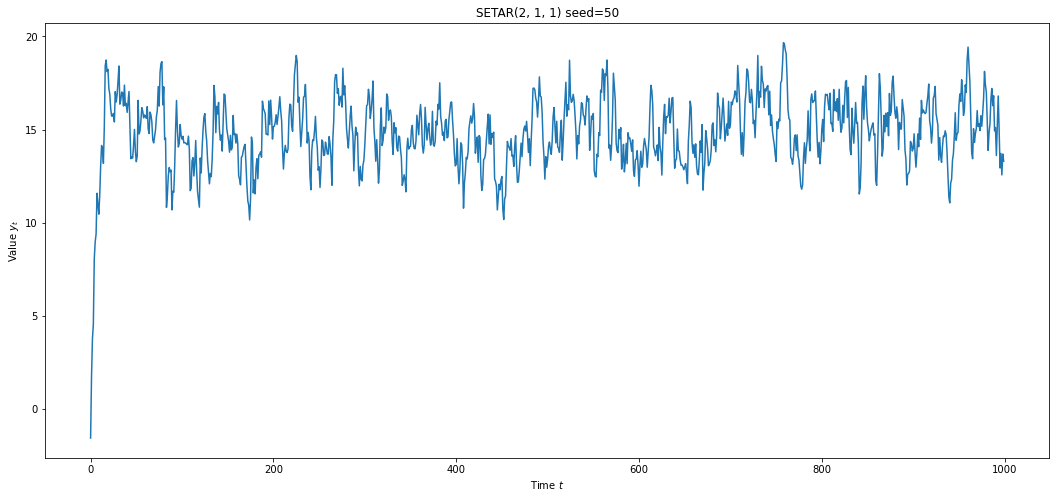

In [7]:
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('SETAR(2, 1, 1) seed=50')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_setar, marker = '', linestyle = '-')
None

In [8]:
def setar(N):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    for t in range(1, N):
        if y[t-1] < 50:
            y[t] = 1.0 + 0.4*y[t-1] + e[t]
        else:
            y[t] = -1.0 + 0.4*y[t-1] + e[t]
    return y, e

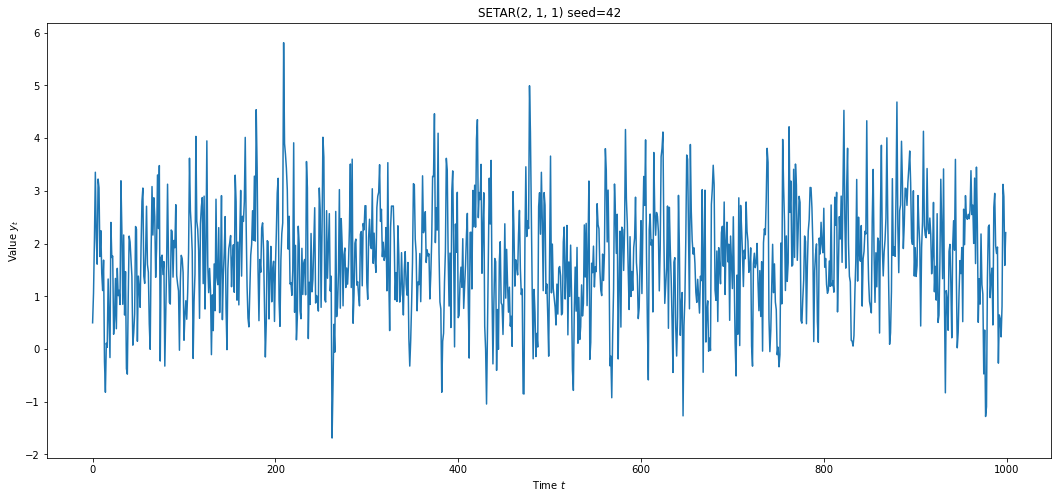

In [9]:
np.random.seed(seed=42)
y_setar, e_setar = setar(N)
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('SETAR(2, 1, 1) seed=42')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_setar, marker = '', linestyle = '-')
None

# IGAR model

In [10]:
def igar(N):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    j = np.random.rand(N)
    for t in range(1,N):
        if j[t] < 0.80:
            y[t] = 0.2 + y[t-1] + e[t]
        else:
            y[t] = -8 + 0.8 * y[t-1] + e[t]
    return y, e

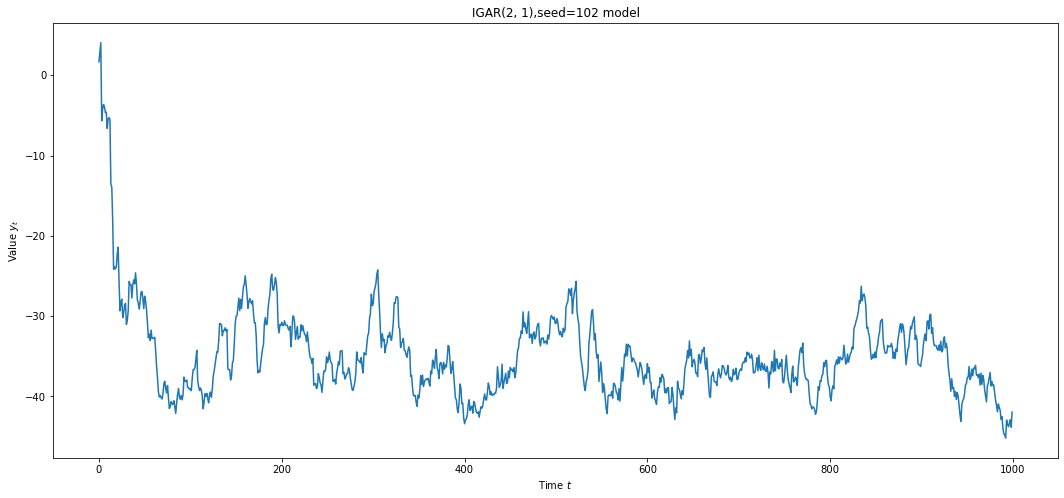

In [11]:
np.random.seed(seed=102)
y_igar, e_igar = igar(N)
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('IGAR(2, 1),seed=102 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_igar, marker = '', linestyle = '-')
None

In [12]:
def igar(N):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    j = np.random.rand(N)
    for t in range(1,N):
        if j[t] < 0.80:
            y[t] = 0.2 + 1.3*y[t-1] + e[t]
        else:
            y[t] = -6 + 0.8 * y[t-1] + e[t]
    return y, e

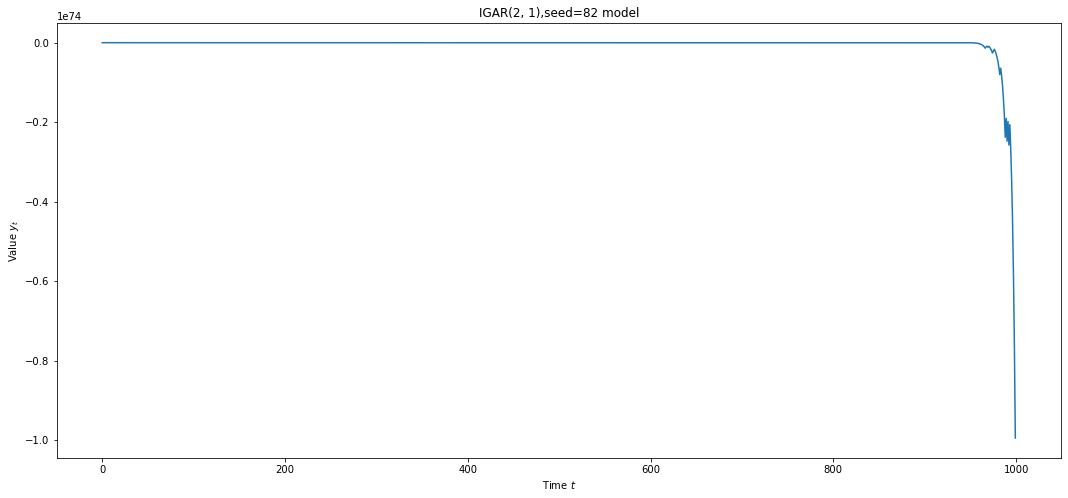

In [13]:
np.random.seed(seed=82)
y_igar, e_igar = igar(N)
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('IGAR(2, 1),seed=82 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_igar, marker = '', linestyle = '-')
None

# MMAR model 1

In [14]:
P = np.array([
    [.90, .1],
    [.05, .95]
])

In [15]:
def mmar(N,P):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    state = np.zeros(N).astype(int)
    for t in range(1,N):
        p_trans = P[state[t - 1]]
        state[t] = np.random.choice(len(P), p = p_trans)
        if state[t] == 0:
            y[t] = 0.2 + y[t-1] + e[t]
        else:
            y[t] = -8 + 0.8 * y[t-1] + e[t]
    return y, e, state

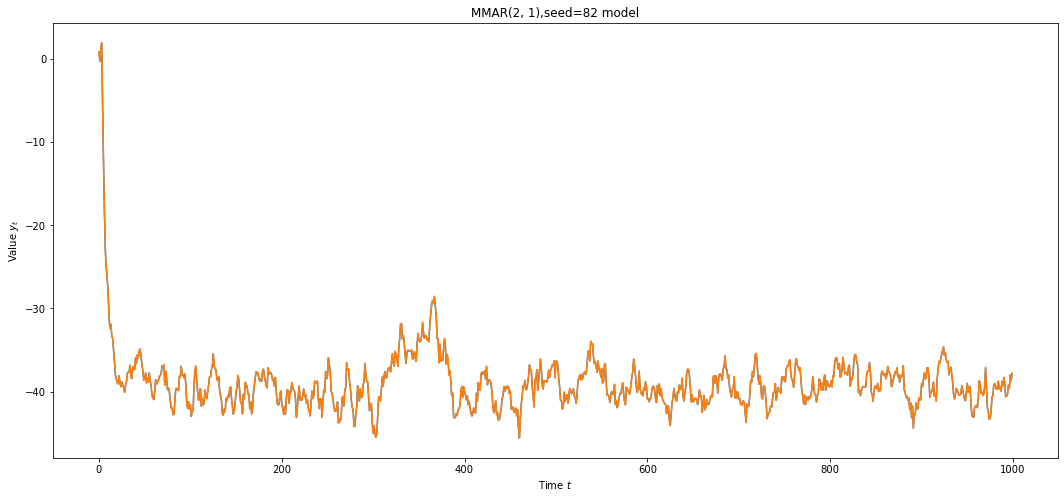

In [16]:
np.random.seed(seed=82)
y_mmar, e_mmar, s_mmar = mmar(N,P)
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('MMAR(2, 1),seed=82 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $s_t$')
ax.plot(ts, y_mmar, marker = '', linestyle = '-')
ax.set_title('MMAR(2, 1),seed=82 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_mmar, marker = '', linestyle = '-')
None

In [17]:
P = np.array([
    [.85, .15],
    [.1, .90]
])

In [18]:
def mmar(N,P):
    e = np.random.randn(N)
    y = np.empty(N)
    y[0] = e[0]
    state = np.zeros(N).astype(int)
    for t in range(1,N):
        p_trans = P[state[t - 1]]
        state[t] = np.random.choice(len(P), p = p_trans)
        if state[t] == 0:
            y[t] = 0.2 + y[t-1] + e[t]
        else:
            y[t] = -8 + 0.8 * y[t-1] + e[t]
    return y, e, state

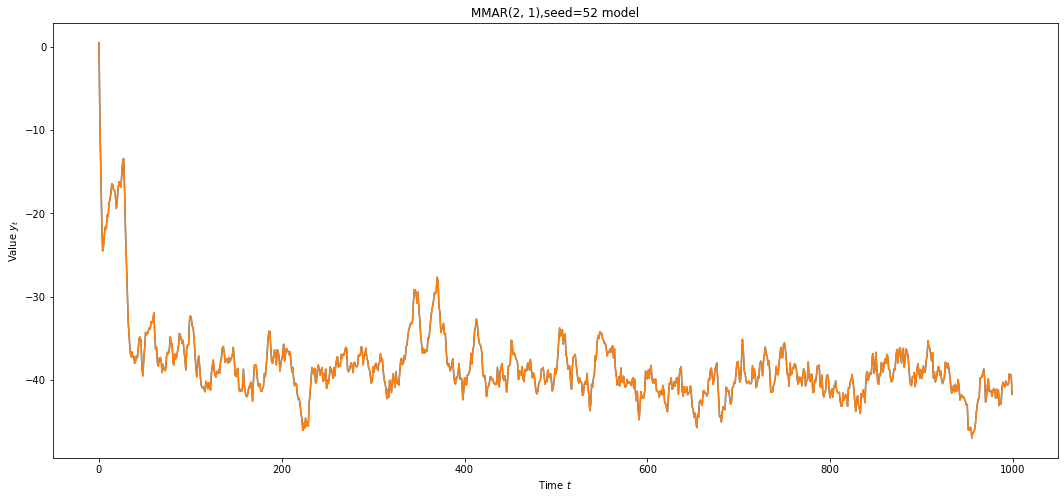

In [19]:
np.random.seed(seed=52)
y_mmar, e_mmar, s_mmar = mmar(N,P)
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_title('MMAR(2, 1),seed=52 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $s_t$')
ax.plot(ts, y_mmar, marker = '', linestyle = '-')
ax.set_title('MMAR(2, 1),seed=52 model')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(ts, y_mmar, marker = '', linestyle = '-')
None

# Part 2

We compute the theoretical conditional mean, $M(x) = E\left\{X_{t+1} \; | \; X_t = x\right\}$, for the $\text{SETAR}(2,1,1)$ model provided above.

$$
M(x) =
\left\{
    \begin{array}{ll}
        3.0 + 0.8 x & \text{if} \; x < 50 \\
        -1 + 0.2 x & \text{if} \; x \geq 50
    \end{array}
\right.
$$


We simulate 1000 values from the chosen SETAR model.

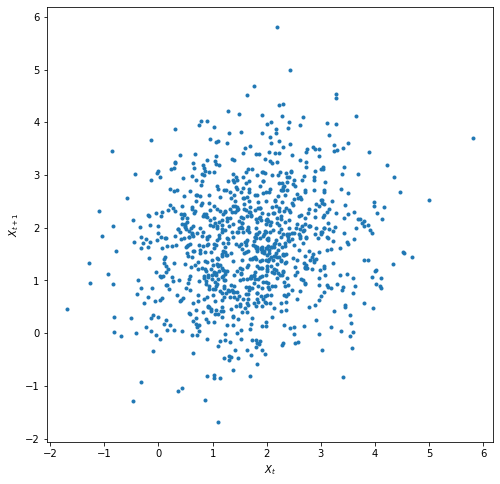

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(y_setar[:-2], y_setar[2:], linestyle = '', marker = '.')
ax.set_xlabel(r'$X_t$')
ax.set_ylabel(r'$X_{t + 1}$')
None

Here, we use the simulated data and a local regression model to estimate the $\hat{M}(x) = E\left\{X_{t+1} \; | \; X_t = x\right\}$:

In [21]:
bws = np.arange(.1, .6, .1)
md("We use following bandwidths: " + ', '.join(['**%.1f**' % bw for bw in bws]))

We use following bandwidths: **0.1**, **0.2**, **0.3**, **0.4**, **0.5**

We calculate local linear estimates.

In [22]:
lowess = [sm.nonparametric.lowess(y_setar[:-1], y_setar[1:], frac = bw, it = 0) for bw in bws]

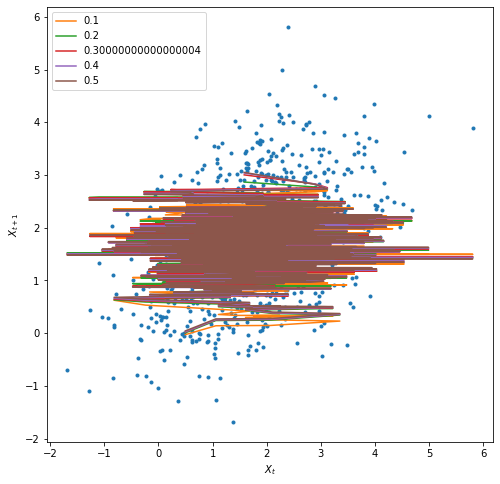

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(y_setar[:-1], y_setar[1:], marker = '.', linestyle = '')
for i in range(len(bws)):
    ax.plot(y_setar[:-1], lowess[i][:, 1], marker = '', linestyle = '-', label = str(bws[i]))
    ax.set_xlabel(r'$X_t$')
    ax.set_ylabel(r'$X_{t + 1}$')
ax.legend()
None

We see that all bandwidths seem to capture the relationship with the lag 1 input.

We also try to apply the LOWESS method directly on the time series data

In [24]:
lowess_ts = [sm.nonparametric.lowess(y_setar, ts, frac = bw, it = 0) for bw in bws]

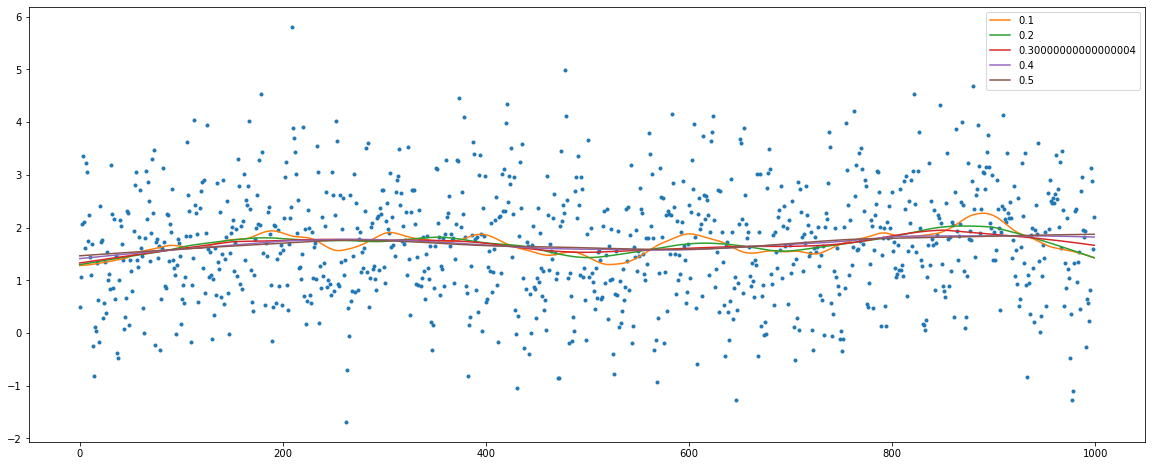

In [25]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(ts, y_setar, marker = '.', linestyle = '')
for i in range(len(bws)):
    ax.plot(ts, lowess_ts[i][:, 1], marker = '', linestyle = '-', label = str(bws[i]))
ax.legend()
None

We see that the 0.1 bandwith most closely captures the regime shift, and does seem to be less affected by local noise.

# Part 3

Define the parameters for the histogram regression

In [26]:
# Number of intervals 
n_bins = 10
# The breaks between the intervals 
breaks = np.linspace(min(y_setar), max(y_setar), n_bins + 1)

In [27]:
## Initialize
h = np.diff(breaks)[0]
l = np.zeros(n_bins)
g = np.zeros(n_bins)
f_hat = np.zeros(n_bins)
h_hat = np.zeros(n_bins)

In [28]:
## Calc the hist regressogram, i.e. for each interval
for i in range(n_bins):
    x_bin = y_setar[(breaks[i] <= y_setar) & (y_setar < breaks[i+1])]
    if len(x_bin) > 4:
        l[i] = x_bin.mean()
        g[i] = np.sum((x_bin - l[i])**2) / len(x_bin)
        f_hat[i] = (n_bins*h)**(-1) * len(x_bin)    
        h_hat[i] = g[i]/f_hat[i];

In [29]:
L = (l*h).cumsum()
#print(L)
H_hat = (h_hat*h).cumsum()
#print(H_hat)

In [30]:
c_alpha = 1.273

In [31]:
H_hat_b = H_hat[-2];
L_low = L - c_alpha * n_bins**(-0.5) * H_hat_b**(0.5) * (1 + H_hat/H_hat_b);
L_upr = L + c_alpha * n_bins**(-0.5) * H_hat_b**(0.5) * (1 + H_hat/H_hat_b);

We plot the computed cumulative means with confidence intervals:

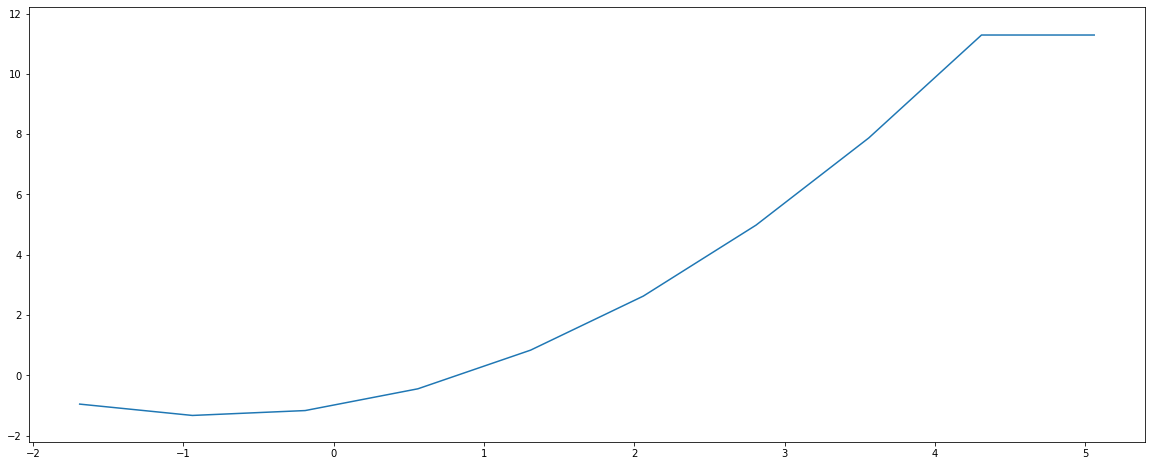

In [32]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.fill_between(breaks[0:-1], L_low, L_upr,  facecolor='#ffffff')
ax.plot(breaks[0:-1], L, marker = '', linestyle = '-')
None

We compare with the theoretical cumulative conditional mean and explore the assymptotic behaviour:

$$
M(x) =
\left\{
    \begin{array}{ll}
        3.0 + 0.8 x & \text{if} \; x < 100 \\
        -1 + 0.2 x & \text{if} \; x \geq 100
    \end{array}
\right.
$$

We compute the theoritical cumulative conditional mean piecewise:

For the first piece we have:
$$\int 3.0 + 0.8 x \; \text{d}x = 3.0x + \frac{1}{2} 0.8 x^2 + C$$

And for the second piece we have:
$$\int  -1 + 0.2 x \; \text{d}x = -1.0x + \frac{1}{2} 0.2 x^2 + C$$

In [33]:
piece_1 = lambda x: 3*x + .8 * .5 * x**2
piece_2 = lambda x: -1*x + .5 * .2 * x**2

In [34]:
np.sum([
    piece_1(100) - piece_1(min(y_setar)),
    piece_2(max(y_setar)) - piece_2(100) 
])

3401.491526388951

We see, that the theoritical commulative mean is varying with the computed using the histogram approach:

In [35]:
L[-2]

11.288314386136793

In [36]:
print(L_low[-2], '-', L_upr[-2])

11.011949353839695 - 11.564679418433892


# Part 4

In [44]:
data_4 = pd.read_csv(r"C:\Users\K_kar\OneDrive\Pictures\Fall'2022\Advanced Time Series Analysis\Comp 1\comp_ex_1_scrips_2018\DataPart4.csv")
data_4.head(5)

,Ph,Ti,Te,W
0,1496.970334,20.002530,12.255610,8.678768
1,1411.792178,19.957051,12.298405,7.185271
2,1368.595696,19.904727,12.576470,6.684292
3,1404.547674,19.886161,12.455047,7.702868
4,1376.436161,19.908530,12.638600,7.047383


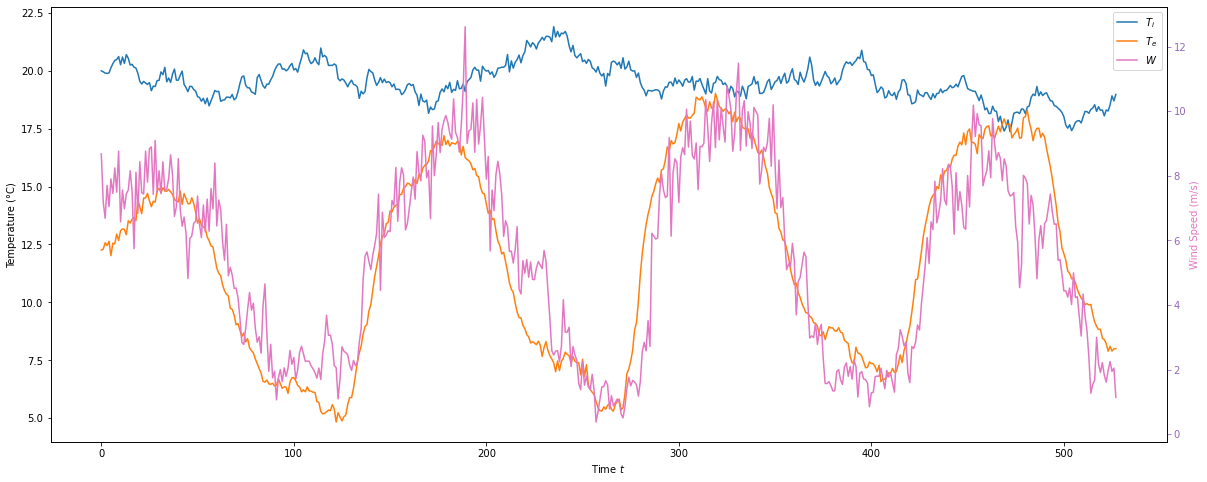

In [45]:
fig, ax = plt.subplots(figsize = (20, 8))
lns1 = ax.plot(data_4['Ti'], label = r'$T_i$')
lns2 = ax.plot(data_4['Te'], label = r'$T_e$')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel('Temperature (°C)')
ax_sec = ax.twinx()
lns3 = ax_sec.plot(data_4['W'], label = r'$W$', color = 'C6')
ax_sec.set_ylabel('Wind Speed (m/s)', color='C6')
ax_sec.tick_params('y', colors='C4')
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
None

In [46]:
W = data_4['W']
U_W = data_4['Ph'] / (data_4['Ti'] - data_4['Te'])

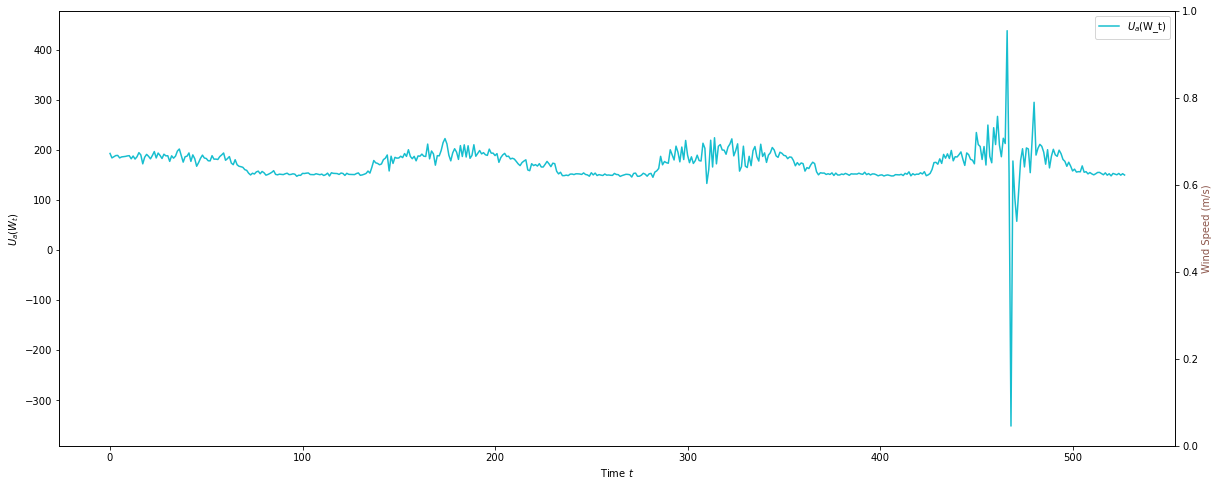

In [47]:
fig, ax = plt.subplots(figsize = (20, 8))
lns1 = ax.plot(U_W, label = r'$U_a($W_t$)$', color = 'C9')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'$U_a(W_t)$')
ax_sec = ax.twinx()

ax_sec.set_ylabel('Wind Speed (m/s)', color='C5')

lns = lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
None

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv(r"C:\Users\K_kar\OneDrive\Pictures\Fall'2022\Advanced Time Series Analysis\Comp 1\comp_ex_1_scrips_2018\DataPart4.csv")
data.head(5)

,Ph,Ti,Te,W
0,1496.970334,20.002530,12.255610,8.678768
1,1411.792178,19.957051,12.298405,7.185271
2,1368.595696,19.904727,12.576470,6.684292
3,1404.547674,19.886161,12.455047,7.702868
4,1376.436161,19.908530,12.638600,7.047383


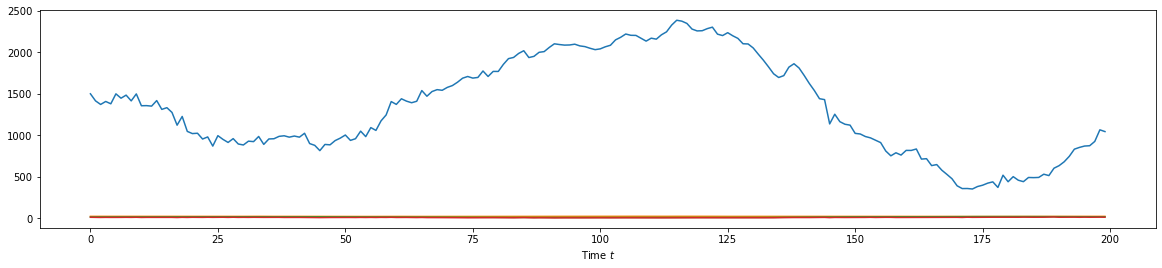

In [50]:
fig, ax = plt.subplots(figsize = (20, 4))
ax.set_xlabel(r'Time $t$')
ax.plot(data[:200])
None

In [51]:
plot_pacf(data['x']);
plot_acf(data['x']);

KeyError: 'x'

In [42]:
from statsmodels.tsa.arima.model import ARMA
arima_model = ARMA(data['x'].values, order=(4,4))
model = arima_model.fit()

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (C:\Users\K_kar\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py)

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
ax.set_xlabel(r'Time $t$')
ax.plot(data[:200])
ax.plot(arma.fittedvalues[:200])

resid = data['x'].values - arma.fittedvalues
fig, ax = plt.subplots(figsize = (20, 4))
ax.set_xlabel(r'Fitted Value $t$')
ax.set_ylabel(r'Residuals')
ax.plot(arma.fittedvalues, resid, color = 'b', marker = '.', linestyle='')

fig, ax = plt.subplots(figsize = (20, 4))
dens = sm.nonparametric.KDEUnivariate(resid)
dens.fit()
ax.plot(dens.cdf)

None